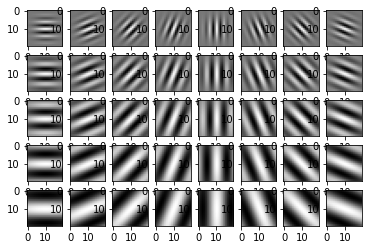

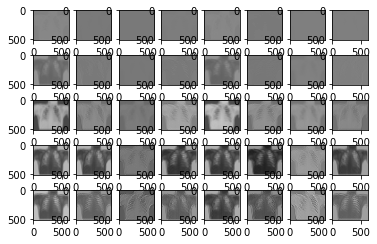

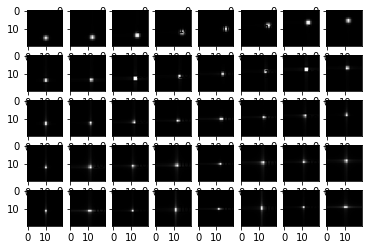

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image

from scipy import signal


###### функция формирования банка фильтров Габора ######
def GB(N):
    kmax = np.pi / 2
    sigma = 2 * np.pi
    f = np.sqrt(2)
    x0 = N / 2
    y0 = N / 2

    F = []

    for mu in range(8):
        for nu in range(5):

            temp_array = np.zeros((N, N), dtype=complex)
            for x in range(N):
                for y in range(N):

                    k = kmax / (f ** nu)
                    omega = mu * (np.pi / 8)
                    G = np.exp(-k ** 2 * ((x - x0) ** 2 + (y - y0) ** 2) / (2 * sigma ** 2))
                    S = np.exp(1j * k * ((x - x0) * np.cos(omega) + (y - y0) * np.sin(omega)))
                    A = k ** 2 / sigma ** 2
                    P = np.exp(-sigma ** 2 / 2)
                    temp_array[x, y] = A*G*(S - P)

            F.append(temp_array)

    return F



############## тестовый пример ###############

img = Image.open('chest-xray.tif').convert('L')
arr = np.array(img)

# формирование банка фильтров Габора
F = GB(20)

# визуализация фильтров Габора
fig1, axs_1 = plt.subplots(5, 8)
for i in range(5):
    for j in range(8):
        axs_1[i,j].imshow(np.real(F[j*5+i]), cmap='gray')


# применение фильтров к исходному изображению
fig2, axs_2 = plt.subplots(5, 8)
for i in range(5):
    for j in range(8):
        rez_conv = signal.convolve2d(arr, F[j*5+i])
        axs_2[i,j].imshow(np.real(rez_conv), cmap='gray')


        
# визуализация Фурье-образов фильтров Габора
fig3, axs_3 = plt.subplots(5, 8)
for i in range(5):
    for j in range(8):
        axs_3[i,j].imshow(np.abs(np.fft.fftshift(np.fft.fft2(F[j*5+i]))), cmap='gray')
        
        

plt.show()


